In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Upload Dataset**

In [3]:
# https://www.kaggle.com/code/ronitkumargupta/gold-price-prediction-model/input
df=pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation of Different column**

In [8]:
df=df.drop(['Date'],axis=1)
df

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [9]:
correlation=df.corr()

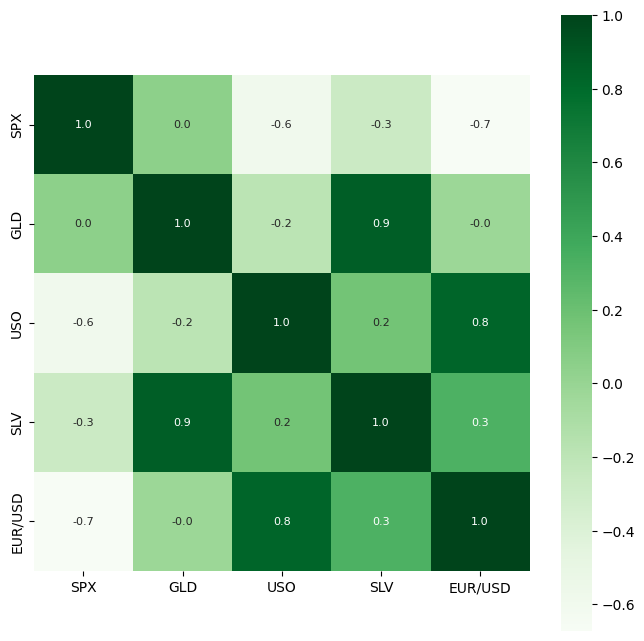

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',

    annot=True, annot_kws={'size':8}, cmap='Greens')
plt.show()

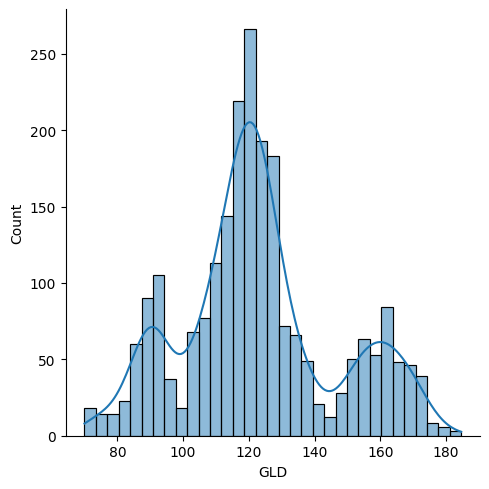

In [11]:
sns.displot(df['GLD'], kde=True)
plt.show()

**Seperate Dependent and Independent Variable**

In [12]:
x=df.drop(['GLD'],axis=1)
Y=df['GLD']

In [13]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [14]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

**Splitting Training and Testing**

In [15]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)


**Linear Regression**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
# Create and train the model

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_X_train_pred = lr_model.predict(X_train)
lr_X_RSE = metrics.r2_score(y_train, lr_X_train_pred)
print("RSE of training data : ", lr_X_RSE)

# Evaluate the model
lr_X_test_pred = lr_model.predict(X_test)

lr_X_RSE = metrics.r2_score(y_test, lr_X_test_pred)
print("RSE of testing data : ", lr_X_RSE)

RSE of training data :  0.8771892526181604
RSE of testing data :  0.8975640982991402


**Test Linear Model**

In [17]:
test = np.array([[1447.160034,  78.370003,  15.2850,  1.474491]])

lr_test_pred = lr_model.predict(test)
print("Price is  : ",lr_test_pred)

Price is  :  [92.57434601]


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:

print(lr_X_test_pred)

[122.51325689 127.0907545  125.50313349 104.54764991 124.90068634
 116.586858   123.04583828 125.14446632 112.05259024 104.88193814
 101.00127079 157.04211875 137.50447931 110.49031012 160.83929478
  88.48009266 117.77776928 118.96072884 121.53807068 128.1487556
 118.02290942 116.08975575 109.6315024  103.05777279 111.84096218
 120.86033322 119.62399827 112.20020453 109.19479998 119.62171119
 196.11502374  99.10085802 157.19764615 122.07046494 113.39777112
 123.34726222 132.36268845 152.08038513 176.64473496 145.03588282
 124.05185863 121.33549213 122.74098458 115.57613444 122.35927588
 112.09083408  93.45476082 116.93571065 126.42056988 118.08975012
 105.4726357  126.56933728 105.64602965 151.78330086 137.80329213
 117.39236458 159.54433502 126.41884417 100.17367568 122.74815137
 109.79583313  86.2818531  113.37269965 120.30638659  88.36184756
 122.81103534 119.41725002 111.29315614 153.0445584   96.20637023
  84.31722327 149.65055559 147.3327689  105.44296836 144.71870893
 106.922959

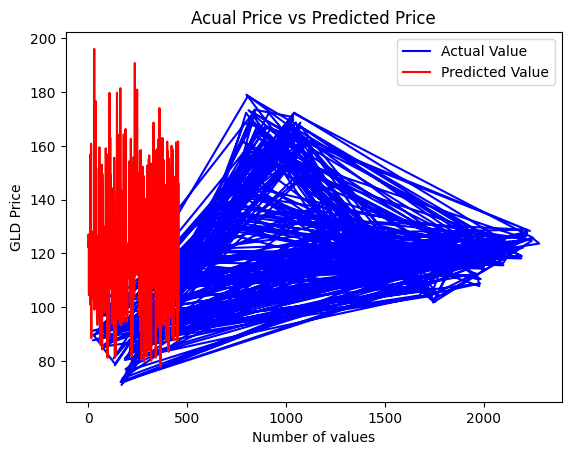

In [19]:
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(lr_X_test_pred, color='red', label='Predicted Value')
plt.title('Acual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

**Random Forest**

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Create and train the Random Forest model with max depth of 10
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the training data
rf_X_train_pred = rf_model.predict(X_train)
rf_train_r2 = metrics.r2_score(y_train, rf_X_train_pred)
print("R² Score of training data: ", rf_train_r2)

# Make predictions on the testing data
rf_X_test_pred = rf_model.predict(X_test)
rf_test_r2 = metrics.r2_score(y_test, rf_X_test_pred)
print("R² Score of testing data: ", rf_test_r2)

R² Score of training data:  0.9980827598803304
R² Score of testing data:  0.9894690054190328


In [21]:
test = np.array([[1447.160034,  78.370003,  15.2850,  1.474491]])

rf_test_pred = rf_model.predict(test)
print("Price is  : ",rf_test_pred)

Price is  :  [85.38373005]


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [22]:
import pickle

# Save the model to a pickle file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


In [23]:
import pickle

# Load the model from the pickle file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
loaded_model.predict(X_test)


array([122.28998585, 130.28551507, 127.71827104,  96.66742237,
       118.95534061, 114.78525087, 124.77973557, 117.89403613,
       108.09175878,  98.10771609,  95.28205699, 167.90222088,
       149.29691212, 116.35745933, 170.48872101,  84.95056128,
       123.98276001, 109.45114549, 112.94284861, 131.66378507,
       124.61063729, 113.46551188, 115.91808118, 108.59932448,
       108.67480375, 125.64405068, 120.05606165, 112.21769522,
       113.256473  , 125.08595807, 145.98346837,  89.54069871,
       167.8080266 , 113.56583305, 108.43913451, 120.2744881 ,
       141.94455   , 161.37838976, 174.07552787, 153.45373188,
       119.1533244 , 112.93323654, 121.3072954 , 113.83895315,
       121.87390741, 108.15124629,  88.83548281, 114.09175495,
       129.93361704, 118.47858318, 104.26696296, 129.93935776,
       107.43349716, 161.18111571, 131.59683486, 119.00111814,
       147.2146455 , 135.76944254,  95.56307282, 124.7101335 ,
       114.74393969,  86.2799899 , 104.34210422, 113.91